<a href="https://colab.research.google.com/github/C-Cruz-Jr/C-Cruz-Jr/blob/main/HW9_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.8557 - loss: 0.4207 - val_accuracy: 0.9238 - val_loss: 0.2316
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9740 - loss: 0.1072 - val_accuracy: 0.9809 - val_loss: 0.0737
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9894 - loss: 0.0475 - val_accuracy: 0.8946 - val_loss: 0.2512
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.9736 - loss: 0.0794 - val_accuracy: 0.9877 - val_loss: 0.0564
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9940 - loss: 0.0243 - val_accuracy: 0.9854 - val_loss: 0.0637
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9966 - loss: 0.0165 - val_accuracy: 0.9832 - val_loss: 0.0680
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9963 - loss: 0.0141 - val_accuracy: 0.9787 - val_loss: 0.0846
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9928 - loss: 0.0238 - val_accuracy: 0.9821 - val_loss: 

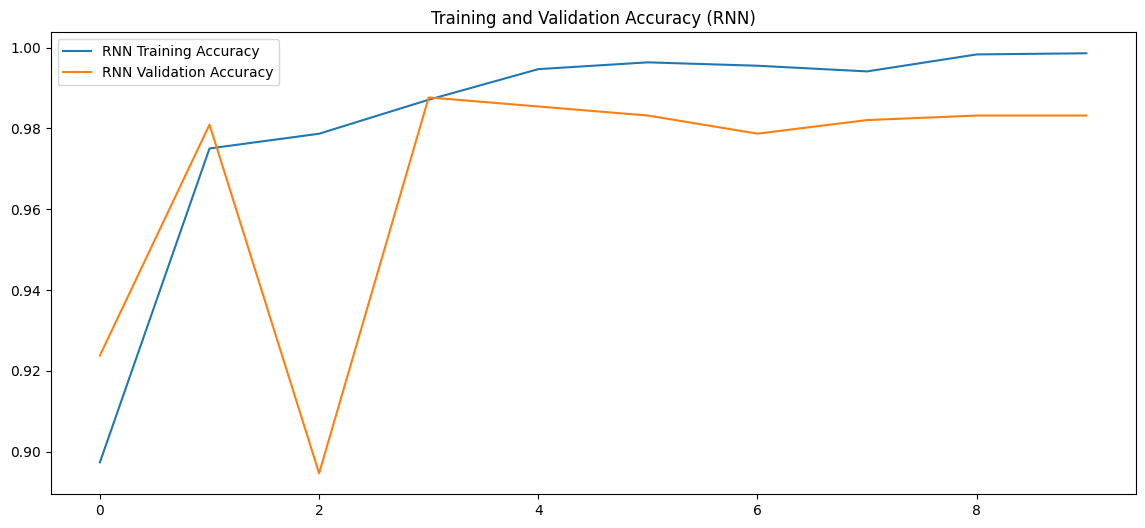

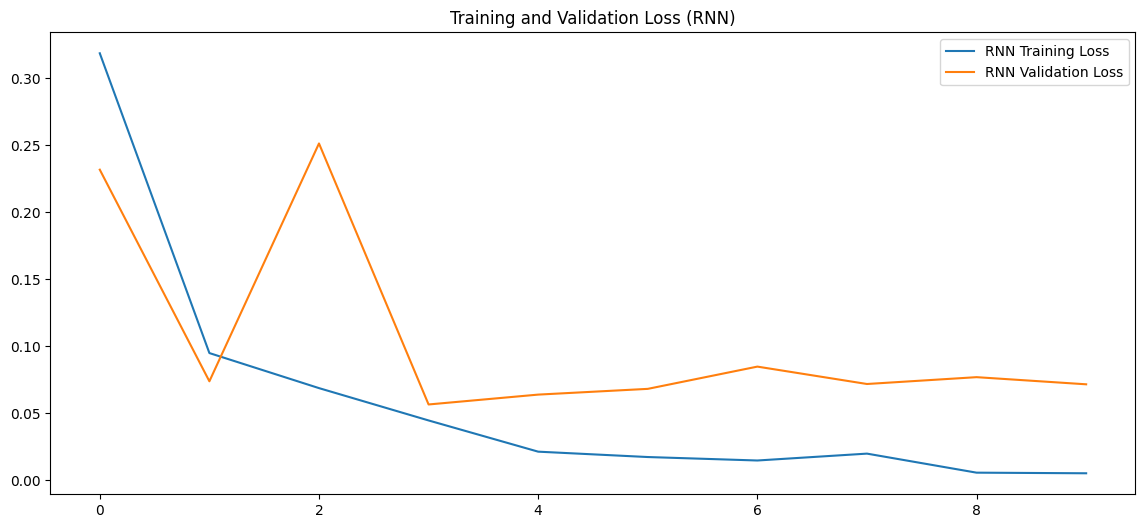

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8445 - loss: 0.4045 - val_accuracy: 0.9395 - val_loss: 0.1820
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9640 - loss: 0.1438 - val_accuracy: 0.9776 - val_loss: 0.0890
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9786 - loss: 0.0795 - val_accuracy: 0.9809 - val_loss: 0.0635
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9888 - loss: 0.0401 - val_accuracy: 0.9854 - val_loss: 0.0572
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9931 - loss: 0.0358 - val_accuracy: 0.9832 - val_loss: 0.0504
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9949 - loss: 0.0196 - val_accuracy: 0.9865 - val_loss: 0.0548
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9854 - val_loss: 0.0674
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9965 - loss: 0.0132 - val_accuracy: 0.9843 - v

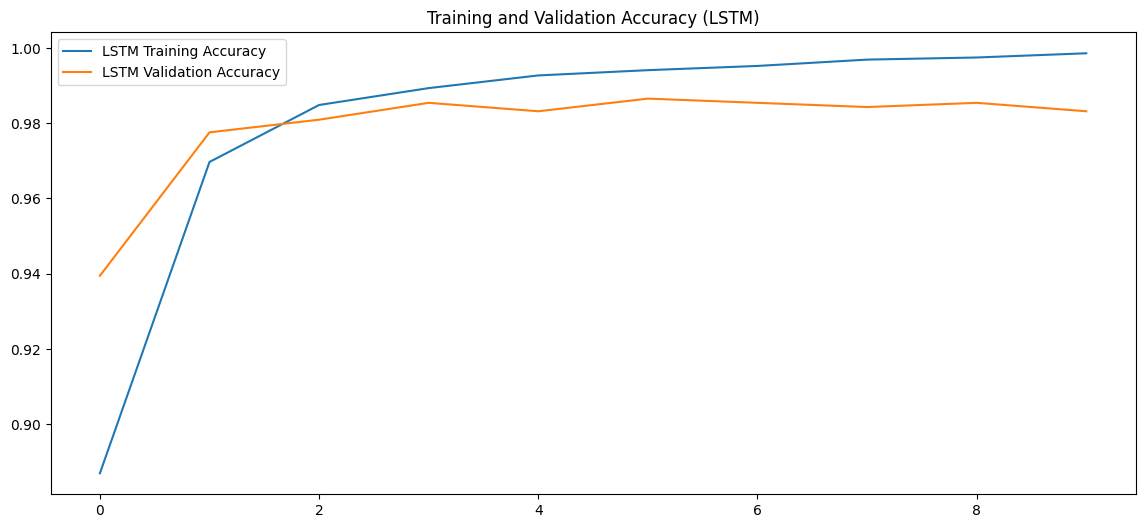

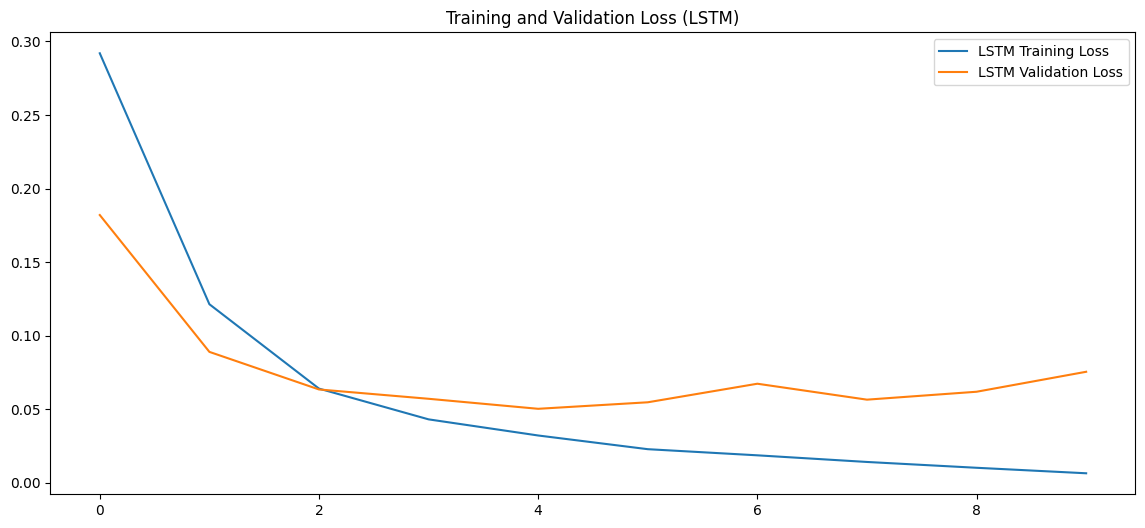

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Email: Limited time offer! Click here to claim your free iPhone 16 upgrade!
Predicted Label: spam

Email: Hey dummy, respond please!
Predicted Label: ham



In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')
data = data[['label', 'sms']].dropna()
texts = data['sms'].values
labels = np.where(data['label'] == 'ham', 0, 1)

# Tokenization parameters
max_features = 10000
maxlen = 500

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=maxlen)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Model 1: Simple RNN
rnn_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(x_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

plt.figure(figsize=(14, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('Training and Validation Accuracy (RNN)')
plt.legend()
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title('Training and Validation Loss (RNN)')
plt.legend()
plt.show()

# Model 2: LSTM
lstm_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

plt.figure(figsize=(14, 6))
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()

# Example emails
sample_emails = [
    "Limited time offer! Click here to claim your free iPhone 16 upgrade!",
    "Hey dummy, respond please!"
]
sample_sequences = tokenizer.texts_to_sequences(sample_emails)
sample_data = pad_sequences(sample_sequences, maxlen=maxlen)
predictions = lstm_model.predict(sample_data)
predicted_labels = ["spam" if pred > 0.5 else "ham" for pred in predictions]
for i, email in enumerate(sample_emails):
    print(f"Email: {email}\nPredicted Label: {predicted_labels[i]}\n")